In [1]:
path = "/content/drive/MyDrive/Colab Notebooks/NOSU/files/oset_sinonims.txt"

file = open(path, "r")
s = file.readline()
file.close()
print(s)

[['аббревиатурæ', 'цыбыркæнынад'], ['абзац', 'алæуд', 'кæс'], ['сæнтдзырд', 'сæнтдзагъд'], ['аразæг', 'саразæг', 'скæнæг', 'сфæлдисæг', 'фыссæг'], ['ном', 'дзырддзæугæдзинад', 'æндæвдад'], ['абетæ', 'дамгъуат'], ['афоныл', 'сахатмæ гæсгæ', 'бæлвырд рæстæгмæ'], ['æцæгдзинад', 'рæстдзинад'], ['акт драмон уацмысы', 'театралон равдысты', 'архайд'], ['фацырд кæнын', 'базмæлын кæнын', 'фæрæвдз казнын'], ['разæнгардæй', 'æвзыгъдæй', 'цырд'], ['ахсджиаг', 'судзаг', 'абоныккон', 'нырыккон', 'риссаг', 'радон', 'аразинаг'], ['ныхасыхатт', 'ныхасыхуыз', 'дзурыныхуыз'], ['бахаххкæнын', 'рахицæн кæнын', 'фæхицæн кæнын', 'фæбæлвырд кæнын', 'æрлæууын', 'цæстуынгæ скæнын'], ['ми', 'къахдзæф', 'хъуыддаг', 'сгуыхтдзинад'], ['аллергорион', 'фæсномыг'], ['стауæн', 'æппæлæн ныхас', 'уæлиаукæнынад'], ['алмаси', 'налхъуыт- налмас'], ['зыдæй', 'æнзафсисæй'], ['гуымиры гуырымыхъхъ', 'æнаив', 'æнæуæзданæй', 'æнæхсæстæй', 'æнæгъдауæй'], ['схъæлдзинад', 'хъалдзинад', 'хъалзæрдæдзинад', 'сæрбæрзонддзинад', 'хиуарзо

In [2]:
lst_sin = eval(s)
print("Количество групп синонимов", len( lst_sin))

Количество групп синонимов 3062


In [3]:
# создаем упорядоченные пары синонимов
import itertools

list_pair_syn = list()
lst_sin_clear = list() 
for group in lst_sin:
  group.sort()
  temp = list(filter(lambda x: x.strip(), group))
  if temp:
    lst_sin_clear.append(temp)
  pairs = list(itertools.combinations(sorted(temp), 2))
  list_pair_syn.extend(pairs)
print("Количество пар синонимов", len(list_pair_syn))

#15644
#15670

Количество пар синонимов 15670


In [4]:
# пары повторяются
print(len(list_pair_syn))
print(sorted(list_pair_syn)[:10])


15670
[('æазуын кæнын', 'аразмаæ кæнын'), ('æазуын кæнын', 'аразмаæ кæнын'), ('æазуын кæнын', 'фæразмæ кæнын'), ('æазуын кæнын', 'фæразмæ кæнын'), ('æазуын кæнын', 'фезмæлынкæнын'), ('æазуын кæнын', 'фезмæлынкæнын'), ('æазуын кæнын', 'фенкъуысын кæнын'), ('æазуын кæнын', 'фенкъуысын кæнын'), ('æбæлвырд', 'æбæрæг'), ('æбæлвырд', 'æбæрæг')]


In [5]:
# пары повторяются
unic_pair_syn = set(list_pair_syn)
print(len(unic_pair_syn))
print(sorted(unic_pair_syn)[:10])

7615
[('æазуын кæнын', 'аразмаæ кæнын'), ('æазуын кæнын', 'фæразмæ кæнын'), ('æазуын кæнын', 'фезмæлынкæнын'), ('æазуын кæнын', 'фенкъуысын кæнын'), ('æбæлвырд', 'æбæрæг'), ('æбæлвырд', 'æнæбæрæг'), ('æбæрæг', 'æнæбæрæг'), ('æбæрæг', 'денæном'), ('æбар', 'æнæбархъомыс'), ('æбар', 'барист')]


In [6]:
# проверка распределения слов по парам синонимов
from collections import Counter

c = Counter(itertools.chain(*unic_pair_syn))
freq = list(c.items())
freq.sort(key = lambda x: x[1], reverse=True)
print("Количество уникальных слов", len(c))
print("Самые частотные слова")
list(freq)[:10]


Количество уникальных слов 4185
Самые частотные слова


[('бæлвырд', 25),
 ('цæсгом', 23),
 ('раст', 22),
 ('æцæг', 20),
 ('æнæдызæрдыг', 18),
 ('судзаг', 18),
 ('уæгъдæй', 18),
 ('кæсын', 17),
 ('фæлитой', 17),
 ('хæйрæг', 17)]

(array([2.574e+03, 8.950e+02, 4.860e+02, 1.120e+02, 4.800e+01, 5.100e+01,
        1.200e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <a list of 10 Patch objects>)

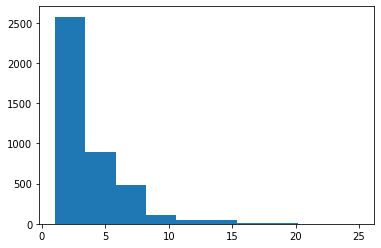

In [7]:
import matplotlib.pyplot as plt

freq = list(c.values())
freq.sort()
plt.hist(freq)

In [9]:
# создадим пары случайных слов
# выберем две случаные группы синонимов и в них по одному случайному слову

import random

lst_rnd_pair_word = list()
while len(lst_rnd_pair_word) < len(unic_pair_syn):
  word1 = random.choice(random.choice(lst_sin_clear))
  word2 = random.choice(random.choice(lst_sin_clear))
  if word1 != word2:
    lst_rnd_pair_word.append(tuple(sorted((word1, word2))))

print(lst_rnd_pair_word)
print(len(lst_rnd_pair_word))

[('райхæлд', 'фæтк'), ('рантъыхт', 'схъæлдзинад'), ('мæцъæлад', 'фæдджи'), ('æцæгæлон бæстаг', 'гуызавæ кæнын'), ('сæнтттыцæуæг', 'сагъæс'), ('æнæрахатгæдзинад', 'адæмон хицаудзинад'), ('хæрзаудæнгæнæг', 'хин'), ('æвджид лæууын', 'исад'), ('козбау кæнын', 'хылкъах'), ('амарын', 'фæдарын'), ('казлæнгæнæг', 'суæгъд кæнын'), ('руайын', 'фæлдахын'), ('идеал', 'хиппæлойдзинад'), ('енæфсис', 'мæцъæлад'), ('æнæивгæдзинад', 'æнæхъуыстгондæй'), ('аивадон дæсныйад', 'саразын'), ('иунаæгдзинад', 'цардæфсæстдзинад'), ('зыр-зыр', 'фæсус'), ('зæххыхъæбул', 'фæхицæн уæвын'), ('æнæхай фæкæнын', 'ном'), ('бамидæг уæвын', 'хъаст бахæссын'), ('къæхты уынæр', 'тугхъуаг'), ('фæсарæны', 'хауын'), ('азæлд', 'фæрайын кæнын'), ('дзæнгæда цæгъдын', 'цудын кæнын'), ('атауыс кæнын', 'хиуарзондзинад'), ('къуындæгдзинад', 'улæфт'), ('амæттаг', 'хуызивд'), ('дæлимон', 'тылифгæнаг'), ('баздухын', 'улæфт'), ('бонасадæн кæнæг', 'галиу кæнын'), ('разхъахъхъæнæг', 'тас'), ('кагрдæджыхал', 'къæйгонд'), ('куыстуромæг', 'къ

In [10]:
lst_rnd_pair_word = set(lst_rnd_pair_word)
print("Количество уникальных пар случайных слов", len(lst_rnd_pair_word))

Количество уникальных пар случайных слов 7610


In [11]:
# проверка распределения слов по парам

c = Counter(itertools.chain(*lst_rnd_pair_word))
freq = list(c.items())
freq.sort(key = lambda x: x[1], reverse=True)
print("Количество уникальных слов", len(c))
print("Самые частотные слова")
list(freq)[:10]


Количество уникальных слов 3921
Самые частотные слова


[('къахын', 24),
 ('аиуварс кæнын', 23),
 ('æцæгдзинад', 20),
 ('тыхсын', 20),
 ('раст', 19),
 ('уæгъд кæнын', 19),
 ('бæрæггæнæн', 19),
 ('æцæг', 19),
 ('уадзын', 19),
 ('уæвын', 18)]

(array([2.157e+03, 9.590e+02, 4.290e+02, 2.350e+02, 7.200e+01, 4.100e+01,
        1.800e+01, 6.000e+00, 2.000e+00, 2.000e+00]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <a list of 10 Patch objects>)

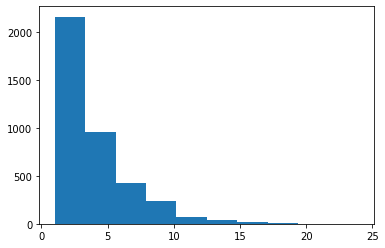

In [12]:
freq = list(c.values())
freq.sort()
plt.hist(freq)

In [ ]:
# проверка на совпадение пар синонимов и случайных слов

intersec = lst_rnd_pair_word.intersection(unic_pair_syn)
intersec

{('акъуырын', 'алыг кæнын'),
 ('арæхстджын', 'цырд'),
 ('архайын', 'зилын'),
 ('бæрæггæнæн', 'нысан'),
 ('зыддзинад', 'кæрæф'),
 ('паддзахиуæг кæнын', 'хицауиуæг кæнын'),
 ('сийын кæнын', 'уазал кæнын')}

In [ ]:
# удалить совпадения из списка случайных пар
temp  = lst_rnd_pair_word - intersec

lst_rnd_pair_word = temp

len(temp)

7639

In [ ]:
# сохраним уникальные пары синонимов
f = open("unic_pair_syn.txt", "w")
f.write(str(unic_pair_syn ))
f.close()
print("количество уникальных пар синонимов", len(unic_pair_syn))

количество уникальных пар синонимов 7615


In [ ]:
# сохраним пары слов
f = open("pair_rnd_words.txt", "w")
f.write(str(list(lst_rnd_pair_word)))
f.close()

In [ ]:
f = open("oset_translate.txt", "r")
lst_translate = eval(f.readline())
f.close()
print(lst_translate)
print(len(lst_translate))

{'хауын': 'падать', 'фӕлдӕхын': 'падать', 'тъупп кӕнын': 'падать', 'уарынгей': 'падать', 'аббревиатуреге': 'аббревиатура', 'цыбыркӕнынад': 'аббревиатура', 'абзац': 'абзац отступ', 'алӕуд': 'абзац отступ', 'кӕс': 'абзац отступ', 'абитуриент': 'абитуриент', 'астӕуккаг скъола фӕуӕвӕг': 'абитуриент', 'угелдӕр скьоламге цӕ-уӕг': 'абитуриент', 'сӕнтдзырд': 'абракадабра нонсенс  бес', 'сӕнтдзагьд': 'абракадабра нонсенс  бес', 'аразӕг': 'автор', 'саразӕг': 'автор', 'скӕнӕг': 'автор', 'сфӕлдисӕг': 'автор', 'фыссӕг.': 'автор', 'ном': 'репутация реноме', 'дзырддзгеуггедзинад': 'авторитет влияние', 'ӕндӕвдад': 'авторитет влияние', 'абетӕ': 'азбука алфавит', 'дамгъуат': 'азбука алфавит', 'афоныл': 'уместно кстати', 'сахатмӕ гӕсгӕ': 'аккуратно пунктуально', 'бӕлвырд рӕстӕгмӕ': 'аккуратно пунктуально', 'ӕцӕгдзинад': 'правда истина', 'ргестдзинад': 'аксиома истина', 'акт драмонуацмысы': 'акт в драматическом произведении в театральном представлении', 'театралонравдысты': 'акт в драматическом произведен